import statements

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [14]:
x = data['YearsExperience'].values

In [15]:
def step(x):
    return np.where(x>=0,1,0)

def sigmoid(x):
    return 1 / (1+np.exp(-x))

def tanh(x):
    return np.tanh(x)

def relu(x):
    return np.maximum(0,x)

def leaky_relu(x, alpha=0.01):
    return np.where(x >= 0, x, alpha * (np.exp(x) - 1))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

activations = {
    'Step' : step,
    'Sigmoid' : sigmoid,
    'Tanh' : tanh, 
    'Leaky ReLU': leaky_relu,
}

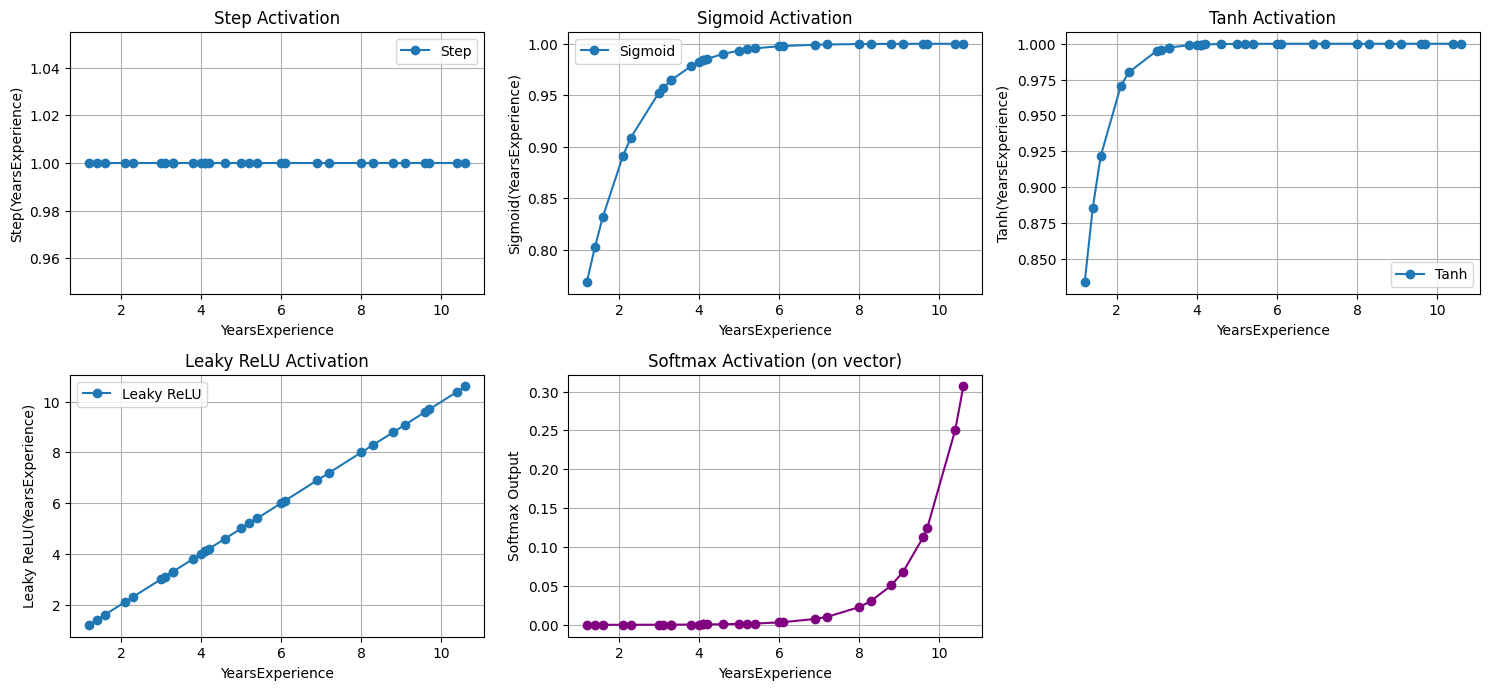

In [18]:
plt.figure(figsize=(15, 10))
for i, (name, func) in enumerate(activations.items(), 1):
    plt.subplot(3, 3, i)
    plt.plot(x, func(x), marker='o', linestyle='-', label=name)
    plt.xlabel('YearsExperience')
    plt.ylabel(f'{name}(YearsExperience)')
    plt.title(f'{name} Activation')
    plt.grid(True)
    plt.legend()

plt.subplot(3, 3, 5)
softmax_output = softmax(x)
plt.plot(x, softmax_output, marker='o', linestyle='-', color='purple')
plt.title('Softmax Activation (on vector)')
plt.xlabel('YearsExperience')
plt.ylabel('Softmax Output')
plt.grid(True)

plt.tight_layout()
plt.show()

In [19]:
data.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


In [20]:
x = data['YearsExperience']

In [21]:
def step(x):
    return np.where(x>=0,1,0)
def sigmoid(x):
    return (1/1 + np.exp(-x))
def tanh(x):
    return np.tanh(x)
def relu(x):
    return np.maximum(0,x)
def leaky_relu(x, alpha=0.01):
    return np.where(x>=0,1,alpha * x)
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

activations = {
    'Step' : step,
    'Sogmoid' : sigmoid,
    'Tanh': tanh,
    'ReLU': relu,
    'Leaky ReLU' : leaky_relu
}

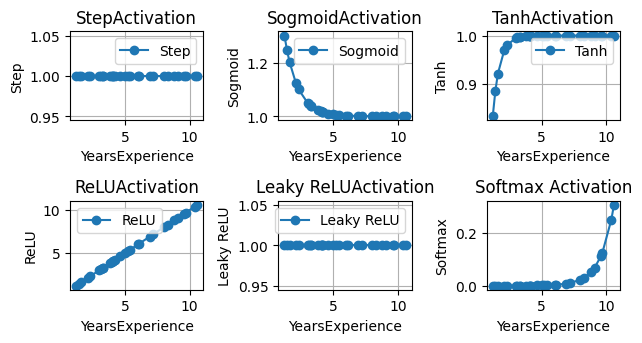

In [24]:
i = 1
for name, func in activations.items():
    plt.subplot(3,3,i)
    plt.plot(x, func(x), 'o-')
    plt.xlabel('YearsExperience')
    plt.ylabel(name)
    plt.title(name + 'Activation')
    plt.grid(True)
    plt.legend([name])
    i += 1

plt.subplot(3,3,6)
plt.plot(x, softmax(x), 'o-')
plt.xlabel('YearsExperience')
plt.ylabel('Softmax')
plt.title('Softmax Activation')
plt.grid(True)

plt.tight_layout()
plt.show()

In [25]:
x = data['YearsExperience'].values.reshape(-1, 1)
y = data['Salary'].values.reshape(-1, 1)

In [48]:
#hidden layer
w1 = np.random.randn(1, 3)
b1 = np.zeros((1, 3))
#output layer
w2 = np.random.randn(3, 1)
b2 = np.zeros((1, 1))
#hyperparameters
lr = 0.001
epochs = 3000

In [35]:
def forward(x):
    #input to hidden layer (weighted sum + bias)
    z1 = x @ w1 + b1
    #apply ReLU
    a1 = relu(z1)
    #hidden to ouput layer 
    z2 = a1 @ w2 + b2
    return z1, a1, z2

In [38]:
#z2 -> predicted output
#y -> true label
z1, a1, z2 = forward(x)
loss = 0.5 * np.mean((z2 - y)**2)
print("Initial loss:",loss)

Initial loss: 3251553638.866667


In [40]:
def backward(x, y, z1, a1, z2):
    #derivative of loss w.r.t z2
    dz2 = z2 - y
    #gradients for output layer 
    dw2 = a1.T @ dz2
    db2 = np.sum(dz2, axis=0, keepdims=True)
    #backprop to hidden layer
    da1 = dz2 @ w2.T
    dz1 = da1 * relu_deriv(z1)
    #gradients for input/hidden layer
    dw1 = x.T @ dz1
    db1 = np.sum(dz1, axis=0, keepdims=True)

    return dw1, db1, dw2, db2

In [41]:
def relu_deriv(x):
    return (x > 0).astype(float)

In [42]:
#forward pass 
z1, a1, z2 = forward(x)
#backward pass 
dw1, db1, dw2, db2 = backward(x, y, z1, a1, z2)
print("dw1:", dw1.shape)
print("db1:", db1.shape)
print("dw2:", dw2.shape)
print("db2:", db2.shape)

dw1: (1, 3)
db1: (1, 3)
dw2: (3, 1)
db2: (1, 1)


In [44]:
#update weights and biases 
w1 = w1 - lr * dw1 
b1 = b1 - lr * db1 
w2 = w2 - lr * dw2
b2 = b2 - lr * db2

In [49]:
for epoch in range(epochs):
    z1, a1, z2 = forward(x)
    loss = 0.5 * np.mean((z2 - y)**2)
    dw1, db1, dw2, db2 = backward(x, y,z1, a1, z2)
    w1 = w1 - lr * dw1
    b1 = b1 - lr * db1
    w2 = w2 - lr * dw2
    b2 = b2 - lr * db2

    if epoch % 100 == 0:
        print(f"Epoch {epoch} - Loss: {loss:.2f}")

Epoch 0 - Loss: 3251817862.73
Epoch 100 - Loss: 369780766.66
Epoch 200 - Loss: 363264399.34
Epoch 300 - Loss: 363249664.26
Epoch 400 - Loss: 363249630.94
Epoch 500 - Loss: 363249630.87
Epoch 600 - Loss: 363249630.87
Epoch 700 - Loss: 363249630.87
Epoch 800 - Loss: 363249630.87
Epoch 900 - Loss: 363249630.87
Epoch 1000 - Loss: 363249630.87
Epoch 1100 - Loss: 363249630.87
Epoch 1200 - Loss: 363249630.87
Epoch 1300 - Loss: 363249630.87
Epoch 1400 - Loss: 363249630.87
Epoch 1500 - Loss: 363249630.87
Epoch 1600 - Loss: 363249630.87
Epoch 1700 - Loss: 363249630.87
Epoch 1800 - Loss: 363249630.87
Epoch 1900 - Loss: 363249630.87
Epoch 2000 - Loss: 363249630.87
Epoch 2100 - Loss: 363249630.87
Epoch 2200 - Loss: 363249630.87
Epoch 2300 - Loss: 363249630.87
Epoch 2400 - Loss: 363249630.87
Epoch 2500 - Loss: 363249630.87
Epoch 2600 - Loss: 363249630.87
Epoch 2700 - Loss: 363249630.87
Epoch 2800 - Loss: 363249630.87
Epoch 2900 - Loss: 363249630.87


In [50]:
#trying tanh instead of relu 
def tanh_derivative(x):
    return 1 - np.tanh(x)**2

In [75]:
x = (x - np.mean(x)) / np.std(x)

In [84]:
np.random.seed(42)
w1 = np.random.randn(1, 10)
b1 = np.zeros((1, 10))
w2 = np.random.randn(10, 1)
b2 = np.zeros((1, 1))
#hyperparameters 
lr = 0.0001
epochs = 2000

In [85]:
def forward(x):
    z1 = x @ w1 + b1
    a1 = tanh(z1)
    z2 = a1 @ w2 + b2
    return z1, a1, z2

In [86]:
def backward(x, y, z1, a1, z2):
    m = x.shape[0]
    dz2 = z2 - y
    dw2 = a1.T @ dz2 / m
    db2 = np.sum(dz2, axis=0, keepdims=True) / m

    dz1 = (dz2 @ w2.T) * tanh_derivative(z1)
    dw1 = x.T @ dz1 / m
    db1 = np.sum(dz1, axis=0, keepdims=True) / m

    return dw1, db1, dw2, db2

In [88]:
losses = []
for epoch in range(epochs):
    z1, a1, z2 = forward(x)
    loss = 0.5 * np.mean((z2 - y)**2)
    losses.append(loss
                 )
    dw1, db1, dw2, db2 = backward(x, y, z1, a1, z2)
    w1 -= lr*dw1
    b1 -= lr*db1
    w2 -= lr*dw2
    b2 -= lr*db2
    if epoch % 100 == 0:
        print(f"Epoch {epoch} - Loss: {loss:.2f}")
predictions = forward(x)[2]
print("\nFinal Predictions:\n",predictions)

Epoch 0 - Loss: 370030198.63
Epoch 100 - Loss: 332700409.11
Epoch 200 - Loss: 301204428.05
Epoch 300 - Loss: 274566358.33
Epoch 400 - Loss: 251975504.27
Epoch 500 - Loss: 710545390.60
Epoch 600 - Loss: 654831442.77
Epoch 700 - Loss: 604788898.91
Epoch 800 - Loss: 559747457.93
Epoch 900 - Loss: 519123460.11
Epoch 1000 - Loss: 482408174.89
Epoch 1100 - Loss: 449157706.54
Epoch 1200 - Loss: 418984289.73
Epoch 1300 - Loss: 391548778.89
Epoch 1400 - Loss: 366523463.83
Epoch 1500 - Loss: 343716843.29
Epoch 1600 - Loss: 322860697.07
Epoch 1700 - Loss: 531969062.15
Epoch 1800 - Loss: 486982742.43
Epoch 1900 - Loss: 446945598.04

Final Predictions:
 [[37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [37410.15551702]
 [53271.53545613]
 [53271.5

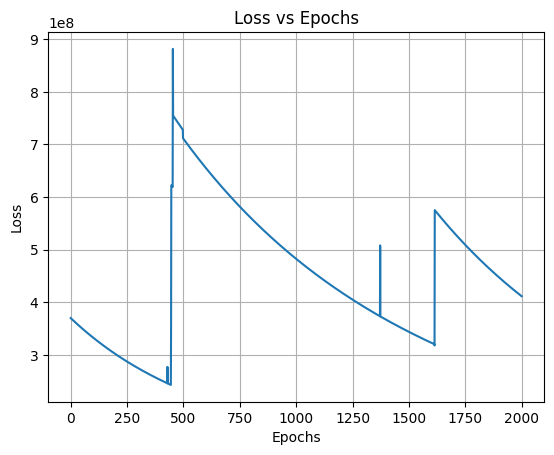

In [89]:
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs")
plt.grid(True)
plt.show()

In [91]:
x_test = np.random.rand(10, 1) * 100
y_test = np.random.rand(10, 1) * 100000
z1_test, a1_test, z2_test = forward(x_test)
test_loss = 0.5 * np.mean((z2_test - y_test) ** 2)
print("Test Loss:",test_loss)
print("Predictions:\n",z2_test)

Test Loss: 1371772231.4317768
Predictions:
 [[ 7323.00230413]
 [ 7323.00230413]
 [ 7323.00230413]
 [ 7323.00230413]
 [29681.30015055]
 [ 7323.00230413]
 [ 7323.00230413]
 [ 7323.00230413]
 [ 7323.00230413]
 [ 7323.00230413]]
